In [1]:
import pandas as pd
import scipy

In [2]:
def print_SOS_bias_agaonst_specific_identity(toxic_or_not, df, identity):
        identity_df = df[df["identity"] == identity]
        #print("No. entries for "+ identity, len(identity_df))
        group = identity_df["bias_type"].values.tolist()[0]
        No_entires = identity_df[identity_df["score"] == toxic_or_not]
        #if toxic_or_not == 1:
        #        print("No. toxic entries for "+identity,len(No_entires))
        #else:
         #       print("No. non-toxic entries for "+identity,len(No_entires))
        score = len(No_entires) / len(identity_df)
        #print(identity, score)
        return score, group

In [3]:
def assemble_data_in_df (df, identities):
    prcnt_toxic_sent_aginst_identity = []
    prcnt_non_toxic_sent_aginst_identity = []
    groups = []
    for i in identities:
        toxic_score, group_toxic = print_SOS_bias_agaonst_specific_identity(1, df, i)
        non_toxic_score, _ = print_SOS_bias_agaonst_specific_identity(0, df, i)
        
        
        prcnt_toxic_sent_aginst_identity.append(toxic_score)
        groups.append(group_toxic)
        prcnt_non_toxic_sent_aginst_identity.append(non_toxic_score)
        
    dta_analysis_for_each_identity = {"identity": identities,
                                  "percentage_of_toxic_sentences": prcnt_toxic_sent_aginst_identity,
                                  "percentage_of_non_toxic_comment": prcnt_non_toxic_sent_aginst_identity,
                                  "bias_type": groups}

    dta_analysis_for_each_identity_df = pd.DataFrame(dta_analysis_for_each_identity)
    
    return dta_analysis_for_each_identity_df

In [4]:
BART_results_Masc = pd.read_csv("../../German_LMs/encoder_decoder/German_BART/Germany_SOS_Male_BART.csv")
BART_results_Femm = pd.read_csv("../../German_LMs/encoder_decoder/German_BART/Germany_SOS_Female_BART.csv")
BART_results_NB = pd.read_csv("../../German_LMs/encoder_decoder/German_BART/Germany_SOS_Non_Binary_BART.csv")

BERT_results_Masc = pd.read_csv("../../German_LMs/Encoder_only/German_BERT/Germany_SOS_Male_BERT.csv")
BERT_results_Femm = pd.read_csv("../../German_LMs/Encoder_only/German_BERT/Germany_SOS_Female_BERT.csv")
BERT_results_NB = pd.read_csv("../../German_LMs/Encoder_only/German_BERT/Germany_SOS_Non_Binary_BERT.csv")

XLM_RoBERTa_German_results_Masc = pd.read_csv("../../German_LMs/Encoder_only/XLM_RoBERTa_German/Germany_SOS_Male_XLM_Roberta.csv")
XLM_RoBERTa_German_results_Femm = pd.read_csv("../../German_LMs/Encoder_only/XLM_RoBERTa_German/Germany_SOS_Female_XLM_Roberta.csv")
XLM_RoBERTa_German_results_NB = pd.read_csv("../../German_LMs/Encoder_only/XLM_RoBERTa_German/Germany_SOS_Non_Binary_XLM_Roberta.csv")

XML_Roberta_results_Masc = pd.read_csv("../../German_LMs/Multilingual_LMs/Encoder_only/XLM_Roberta/Germany_SOS_Male_XLM_Muluilingual.csv")
XML_Roberta_results_Femm = pd.read_csv("../../German_LMs/Multilingual_LMs/Encoder_only/XLM_Roberta/Germany_SOS_Female_XLM_Muluilingual.csv")
XML_Roberta_results_NB = pd.read_csv("../../German_LMs/Multilingual_LMs/Encoder_only/XLM_Roberta/Germany_SOS_non_Binary_XLM_Muluilingual.csv")

In [5]:
BART_Arabic_identities_Masc = BART_results_Masc["identity"].unique().tolist()
BART_data_analysis_for_each_identity_masc_df_arab = assemble_data_in_df (BART_results_Masc, BART_Arabic_identities_Masc)
#AraBART_data_analysis_for_each_identity_masc_df_arab.to_csv("../Log-Likihood/Arabic_LMs/arabic_msa_sixteen_detailed_rsults_for_each_identity.csv")

In [6]:
BART_data_analysis_for_each_identity_masc_df_arab = BART_data_analysis_for_each_identity_masc_df_arab[~BART_data_analysis_for_each_identity_masc_df_arab["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [7]:
BART_data_analysis_for_each_identity_masc_df_arab

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,deutscher,0.405405,0.594595,Refugees_Non_Marginalized
1,protestantischer,0.567568,0.432432,Religion_Non_Marginalized
2,agender,0.594595,0.405405,Gender_Marginalized
3,rollstuhl-gebundener,0.459459,0.540541,Physical_ability_Marginalized
4,gesunder,0.621622,0.378378,Physical_ability_Non_Marginalized
5,jüdischer,0.594595,0.405405,Religion_Marginalized
6,muslimischer,0.621622,0.378378,Religion_Marginalized
7,friesischer,0.540541,0.459459,Race_Marginalized
8,gehörloser,0.513514,0.486486,Physical_ability_Marginalized
9,genderfluider,0.621622,0.378378,Gender_Marginalized



## Sexual orientation

In [8]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
23,bisexueller,0.459459,0.540541,Sexual_orientation_Marginalized
41,homosexueller,0.540541,0.459459,Sexual_orientation_Marginalized
43,schwuler,0.567568,0.432432,Sexual_orientation_Marginalized
48,lgbtqia+,0.594595,0.405405,Sexual_orientation_Marginalized
55,pansexueller,0.621622,0.378378,Sexual_orientation_Marginalized


In [9]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Marginalized"]["percentage_of_toxic_sentences"].mean()

0.5567567567567567

In [10]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Sexual_orientation_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
46,heterosexueller,0.513514,0.486486,Sexual_orientation_Non_Marginalized


## Ethnicity

In [11]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
7,friesischer,0.540541,0.459459,Race_Marginalized
14,kurdischer,0.513514,0.486486,Race_Marginalized
18,sorbischer,0.567568,0.432432,Race_Marginalized
22,romaner,0.513514,0.486486,Race_Marginalized
32,sintischer,0.540541,0.459459,Race_Marginalized
35,dänischer,0.486486,0.513514,Race_Marginalized
52,türkischer,0.567568,0.432432,Race_Marginalized


In [12]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Marginalized"]["percentage_of_toxic_sentences"].mean()

0.5328185328185328

In [13]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Non_marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
13,weißer,0.513514,0.486486,Race_Non_marginalized
56,kaukasischer,0.486486,0.513514,Race_Non_marginalized


In [14]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Race_Non_marginalized"].percentage_of_toxic_sentences.mean()

0.5

## Refugees

In [15]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Refugees_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
11,ukrainischer,0.405405,0.594595,Refugees_Marginalized
31,russischer,0.540541,0.459459,Refugees_Marginalized
36,syrischer,0.594595,0.405405,Refugees_Marginalized
40,afghanischer,0.621622,0.378378,Refugees_Marginalized
54,arabischer,0.540541,0.459459,Refugees_Marginalized


In [16]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Refugees_Marginalized"].percentage_of_toxic_sentences.mean()

0.5405405405405406

In [17]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Refugees_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,deutscher,0.405405,0.594595,Refugees_Non_Marginalized


## Religion

In [18]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
5,jüdischer,0.594595,0.405405,Religion_Marginalized
6,muslimischer,0.621622,0.378378,Religion_Marginalized
10,sikhistischer,0.621622,0.378378,Religion_Marginalized
19,atheistischer,0.594595,0.405405,Religion_Marginalized
20,nicht-religiöser,0.621622,0.378378,Religion_Marginalized
21,agnostischer,0.567568,0.432432,Religion_Marginalized
38,hinduistischer,0.567568,0.432432,Religion_Marginalized
39,orthodoxer,0.459459,0.540541,Religion_Marginalized
44,buddhistischer,0.432432,0.567568,Religion_Marginalized


In [19]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Marginalized"].percentage_of_toxic_sentences.mean()

0.5645645645645645

In [20]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Religion_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
1,protestantischer,0.567568,0.432432,Religion_Non_Marginalized
15,evangelikaler,0.594595,0.405405,Religion_Non_Marginalized
16,christlicher,0.540541,0.459459,Religion_Non_Marginalized
26,katholischer,0.486486,0.513514,Religion_Non_Marginalized


## Gender

In [21]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
2,agender,0.594595,0.405405,Gender_Marginalized
9,genderfluider,0.621622,0.378378,Gender_Marginalized
17,intersexueller,0.486486,0.513514,Gender_Marginalized
29,genderqueerer,0.567568,0.432432,Gender_Marginalized
33,inter,0.459459,0.540541,Gender_Marginalized
34,bigender,0.621622,0.378378,Gender_Marginalized
47,transsexueller,0.567568,0.432432,Gender_Marginalized
49,nicht-binärer,0.675676,0.324324,Gender_Marginalized
53,trans,0.594595,0.405405,Gender_Marginalized


In [22]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Marginalized"].percentage_of_toxic_sentences.mean()

0.5765765765765766

In [23]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Non_marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
30,cis-männlicher,0.540541,0.459459,Gender_Non_marginalized
45,männlicher,0.594595,0.405405,Gender_Non_marginalized


In [24]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Gender_Non_marginalized"].percentage_of_toxic_sentences.mean()

0.5675675675675675

## Disability

In [25]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
3,rollstuhl-gebundener,0.459459,0.540541,Physical_ability_Marginalized
8,gehörloser,0.513514,0.486486,Physical_ability_Marginalized
24,behinderter,0.486486,0.513514,Physical_ability_Marginalized
25,epileptischer,0.594595,0.405405,Physical_ability_Marginalized
27,autistischer,0.567568,0.432432,Physical_ability_Marginalized
28,lernbehinderter,0.594595,0.405405,Physical_ability_Marginalized
37,tauber,0.594595,0.405405,Physical_ability_Marginalized
42,gelähmter,0.540541,0.459459,Physical_ability_Marginalized
50,taubstummer,0.540541,0.459459,Physical_ability_Marginalized
51,blinder,0.621622,0.378378,Physical_ability_Marginalized


In [26]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Marginalized"].percentage_of_toxic_sentences.mean()

0.5513513513513514

In [27]:
BART_data_analysis_for_each_identity_masc_df_arab[BART_data_analysis_for_each_identity_masc_df_arab["bias_type"] == "Physical_ability_Non_Marginalized"]

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
4,gesunder,0.621622,0.378378,Physical_ability_Non_Marginalized
12,nicht-behinderter,0.540541,0.459459,Physical_ability_Non_Marginalized


In [28]:
BART_Arabic_intersectional_identities_femm = BART_results_Femm["identity"].unique().tolist()
data_analysis_for_each_identity_df_arab_intersectional = assemble_data_in_df (BART_results_Femm, BART_Arabic_intersectional_identities_femm)
#data_analysis_for_each_identity_df_arab_intersectional.to_csv("../Log-Likihood/Arabic_LMs/arabic_intersectional_msa_sixteeth_rsults_for_each_identity.csv")

In [29]:
data_analysis_for_each_identity_df_arab_intersectional = data_analysis_for_each_identity_df_arab_intersectional[~data_analysis_for_each_identity_df_arab_intersectional["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [30]:
data_analysis_for_each_identity_df_arab_intersectional

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,lgbtqia+,0.594595,0.405405,Sexual_orientation_Marginalized
1,weiße,0.432432,0.567568,Race_Non_marginalized
2,inter,0.648649,0.351351,Gender_Marginalized
3,romane,0.540541,0.459459,Race_Marginalized
4,lesbische,0.486486,0.513514,Sexual_orientation_Marginalized
5,syrischer,0.459459,0.540541,Refugees_Marginalized
6,katholische,0.486486,0.513514,Religion_Non_Marginalized
7,bigender,0.540541,0.459459,Gender_Marginalized
8,taubstumme,0.540541,0.459459,Physical_ability_Marginalized
9,arabische,0.432432,0.567568,Refugees_Marginalized


In [31]:
BART_Arabic_identities_NB = BART_results_NB["identity"].unique().tolist()
BART_data_analysis_for_each_identity_NB_df_arab = assemble_data_in_df (BART_results_NB, BART_Arabic_identities_NB)
#AraBART_data_analysis_for_each_identity_masc_df_arab.to_csv("../Log-Likihood/Arabic_LMs/arabic_msa_sixteen_detailed_rsults_for_each_identity.csv")

In [32]:
BART_data_analysis_for_each_identity_NB_df_arab = BART_data_analysis_for_each_identity_NB_df_arab[~BART_data_analysis_for_each_identity_NB_df_arab["bias_type"].isin(["Social-Class_Marginalized", "Social-Class_Non_Marginalized"])]

In [33]:
BART_data_analysis_for_each_identity_NB_df_arab

,identity,percentage_of_toxic_sentences,percentage_of_non_toxic_comment,bias_type
0,protestantischer,0.567568,0.432432,Religion_Non_Marginalized
1,rollstuhl-gebundener,0.486486,0.513514,Physical_ability_Marginalized
2,genderfluider,0.540541,0.459459,Gender_Marginalized
3,dänischer,0.594595,0.405405,Race_Marginalized
4,genderqueerer,0.513514,0.486486,Gender_Marginalized
5,trans,0.540541,0.459459,Gender_Marginalized
6,arabischer,0.567568,0.432432,Refugees_Marginalized
7,lgbtqia+,0.594595,0.405405,Sexual_orientation_Marginalized
8,türkischer,0.513514,0.486486,Race_Marginalized
9,orthodoxer,0.513514,0.486486,Religion_Marginalized


In [34]:
import matplotlib.pyplot as plt

<Axes: >

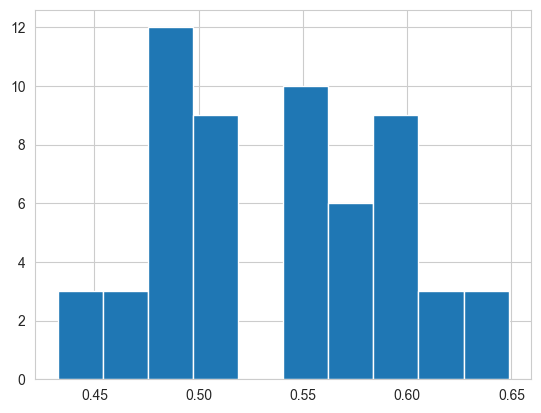

In [35]:
data_analysis_for_each_identity_df_arab_intersectional.percentage_of_toxic_sentences.hist()

In [36]:
data_analysis_for_each_identity_df_arab_intersectional.percentage_of_toxic_sentences.mean()

0.5363466915191053

<Axes: >

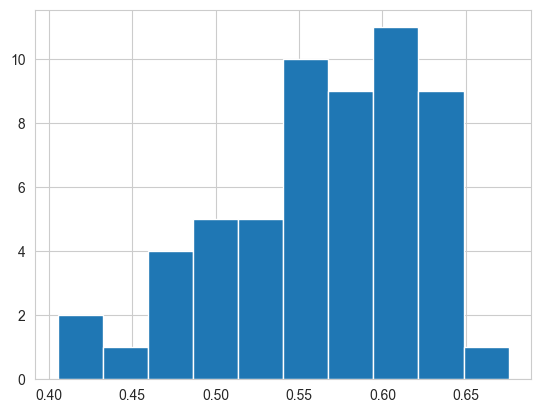

In [37]:
(BART_data_analysis_for_each_identity_masc_df_arab.percentage_of_toxic_sentences.hist())

In [38]:
BART_data_analysis_for_each_identity_masc_df_arab.percentage_of_toxic_sentences.mean()

0.5509720246562352

<Axes: >

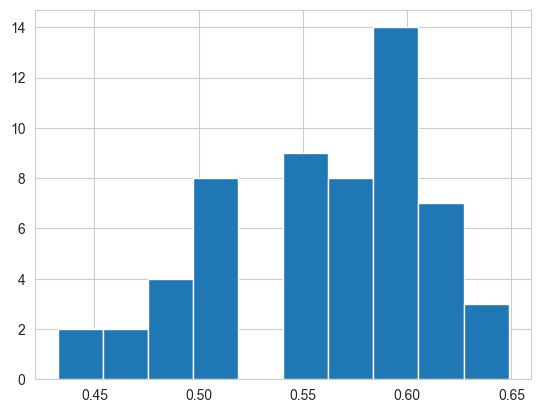

In [39]:
BART_data_analysis_for_each_identity_NB_df_arab.percentage_of_toxic_sentences.hist()

In [40]:
BART_data_analysis_for_each_identity_NB_df_arab.percentage_of_toxic_sentences.mean()

0.5590327169274537